<a href="https://colab.research.google.com/github/Ariara61/ESAA/blob/main/%ED%95%B8%EC%A6%88%EC%98%A8_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_157~202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chapter4. 모델 훈련**
* 선형 회귀를 훈련시키는 두 가지 방법
 * 직접 계산할 수 있는 공식을 사용하여 훈련 세트에 가장 잘 맞는 모델 파라미터(즉, 훈련 세트에 대해 비용감수를 최소화하는 모델 파라미터)를 해석적으로 구함
 * 경사 하강법(GD)이라 불리는 반복적인 최적화 방식을 사용하여 모델 파라미터를 조금씩 바꾸면서 비용 함수를 훈련 세트에 대해 최소화시킴. 결국에는 앞의 방법과 동일한 파라미터로 수렴. 경사 하강법의 변종으로 배치 경사 하강법, 미니배치 경사 하강법, 확률적 경사 하강법이 있음.

* 다항 회귀: 선형 회귀보다 파라미터가 많아서 훈련 데이터에 과대적합되기 더 쉬움.

* 로지스틱 회귀와 소프트맥스 회귀

## 4.1 선형 회귀
* 선형 모델인 입력 특서으이 가중치 합과 편향(bias)(또는 절편) 이라는 상수를 더해 예측을 만듦

* $\widehat{y} = \theta _{0} + \theta _{ x_{1} } + \theta _{ x_{2} } +  \ldots  +   {\theta_{n}} _{x_{n}}$
 * $\widehat{y}$: 예측값
 * $n$: 특서의 수
 * $x_{i}$: $i$번째 특성값
 * $\theta_{j}$: $j$번째 모델 파라미터 (편향 $\theta _{0}$과 특성의 가중치 $\theta _{1}$, $\theta _{2}$,  $\ldots$, $\theta _{n}$을 포함)

* $\widehat{y} = h_{ \theta }(x) = \theta  \ast x$
 * $\theta$: 편향 $\theta_{0}$과 $\theta_{1}$에서 $\theta_{n}$까지의 특성 가중치를 담은 모델의 파라미터
 * $x$: $x_{0}$에서 $x_{n}$까지 담은 샘플의 특성 벡터. $x_{0}$은 항상 1.
 * $theta ·x$: 벡터 $\theta$와 $x$의 점곱. $\theta _{ x_{1} } + \theta _{ x_{2} } +  \ldots  +   {\theta_{n}} _{x_{n}}$와 같음.
 * $h_{ \theta }$: 모델 파라미터 $\theta$를 사용한 가설 함수

* 모델 훈련: 모델이 훈련 세트에 가장 잘 맞도록 모델 파라미터를 설정하는 것
* 선형 회귀 모델을 훈련시키려면 RMSE를 최소화하는 $\theta$를 찾아야 함
* 실제로는 RMSE보다 평균 제곱 오차(MSE)를 최소화하는 것이 같은 결과를 내면서 더 간단함.

* 훈련 세트 $x$에 대한 선형 회귀 가설 $h_{ \theta }$의 MSE = $MSE(X,  h_{ \theta }) =  \frac{1}{m} \sum_{i = 1}^m (  \theta ^{T} x^{(i)} -  y^{(i)}   )^2   $


### 4.1.1 정규방정식
* 정규방정식: 비용 함수 $\theta$ 값을 찾기 위한 해석적인 방법
* 정규방정식: $\widehat{ \theta } = ( X^{T}X)^{-1}X^{T}y $
 * $\widehat{ \theta }$: 비용 함수를 최소화하는 $\theta$ 값
 * y: $y^{(1)}$부터 $y^{(m)}$까지 포함하는 타깃 벡터


In [1]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

* 넘파이 선형대수 모듈(np.linalg)에 있는 inv() 함수를 사용해 역행렬을 계산하고 dot() 메서드를 사용해 행렬 곱셈을 함

In [2]:
X_b = np.c_[np.ones((100, 1)), X]    # 모든 샘플에 x0 = 1을 추가
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

* 이 데이터를 생성하기 위해 사용한 함수는 $y = 4 + 3x_{1} + 가우시안 잡음$

In [3]:
theta_best

array([[3.58188043],
       [3.22855407]])

* $\widehat{ \theta }$을 사용해 예측

In [4]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]    # 모든 샘플에 x0 = 1을 추가
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.58188043],
       [10.03898858]])

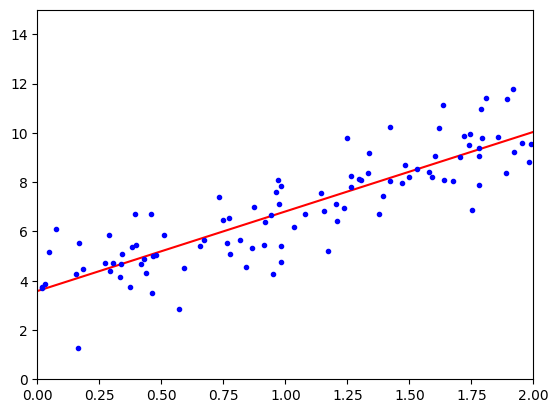

In [5]:
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [6]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

lin_reg.intercept_, lin_reg.coef_

(array([3.58188043]), array([[3.22855407]]))

In [7]:
lin_reg.predict(X_new)

array([[ 3.58188043],
       [10.03898858]])

* LinearRegression 클래스는 scipy.linalg.lstsq() 함수를 기반으로 함.

In [8]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond = 1e-6)
theta_best_svd

array([[3.58188043],
       [3.22855407]])

* 이 함수는 $\widehat{ \theta } =  X^{+}y $을 계산함
 * $X^{+}$: $X$의 유사역행렬

* np.linalg.pinv() 함수를 사용해 유사역행렬을 직접 구할 수 있음

In [9]:
np.linalg.pinv(X_b).dot(y)

array([[3.58188043],
       [3.22855407]])

* 유사역행렬은 특잇값 분해(SVD)라 부르는 표준 행렬 분해 기법을 사용해 계산됨
* SVD는 훈련 세트 행렬 X를 3개의 행렬 곱셈 $U \sum V^{T} $로 분해됨
* 유사역행렬은 $ X^{+} = V  { \sum}^{+} U^{T}$로 계산됨.
* ${ \sum}^{+}$를 계산하기 위해 알고리즘이 $\sum$를 먼저 구하고 그 다음 어떤 낮은 임곗값보다 작은 모든 수를 0으로 바꿈. 그 다음 0이 아닌 모든 값을 역수로 치환함. 마지막으로 만들어진 행렬을 전치.
* 정규방정식을 계산하는 것보다 이 방식이 훨씬 효율적이며, 극단적인 경우도 처리할 수 있음.
* 실제로 $m < n$이거나 어떤 특성이 중복되어 행렬 $X^{T}X$의 역행렬이 없다면 정규방정식이 작동하지 않음. 하지만 유사역행렬은 항상 구할 수 있음.

### 4.1.2 계산 복잡도
* 정규방정식은 $(n+1)*(n+1) 크기가 되는 X^{T}X$의 역행렬을 계산함.
* 역행렬을 계산하는 계산 복잡도는 일반적으로 $O( n^{2.4}) $에서 $O( n^{3}) $의 사이 (특성 수가 두 배로 늘어나면 계산 시간이 대략 $2^{2.4} =5.3$에서 $2^{3} = 8$배로 증가
* 사이킷런의 LinearRegression 클래스가 사용하는 SVD 방법은 약 $O(n^{2})$
* 정규방정식이나 다른 알고리즘으로 학습된 선형 회귀 모델은 예측이 매우 빠름.

## 4.2 경사 하강법
* 경사 하강법(GD): 비용 함수를 최소화하기 위해 반복해서 파라미터를 조정
* 파라미터 벡터 $\theta$에 대해 비용 함수의 현재 그래디언트를 계산. 그리고 그래디언트가 감소하는 방향으로 진행함.
* $\theta$를 임의의 값으로 시작해서 한번에 조금씩 비용함수가 감소되는 방향으로 진행하여 알고리즘이 최솟값에 수렴할 때까지 점진적으로 향상시킴

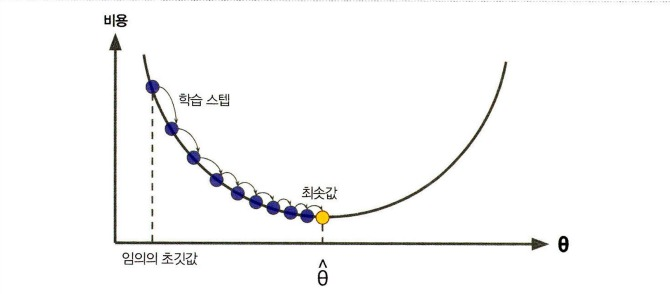

* 경사 하강법에서 중요한 파라미터는 스텝의 크기로, 학습률 하이퍼파라미터로 결정됨
* 학습률이 너무 작으면 알고리즘이 수렴하기 위해 반복을 많이 진행해야 하므로 시간이 오래 걸림

* 학습률이 너무 작을 때
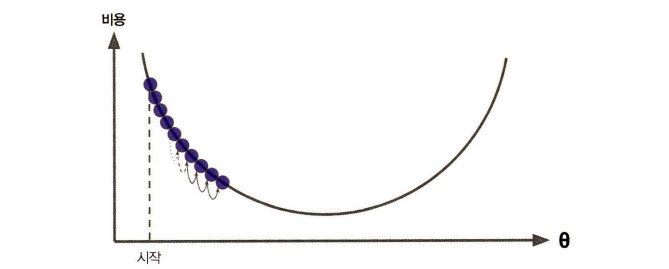

* 학습률이 너무 크면 알고리즘을 더 큰 값으로 발산하게 만들어 적절한 해법을 찾지 못하게 함

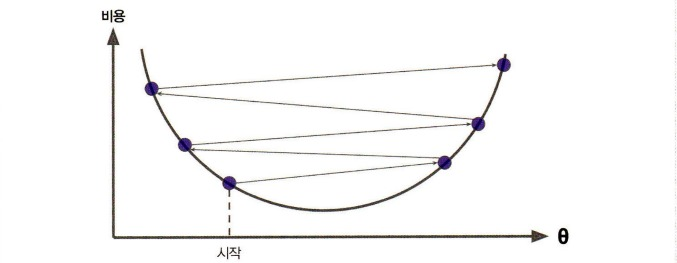

* 경사 하강법의 문제점
 * 무작위 초기화 때문에 알고리즘이 왼쪽에서 시작하면 전역 최솟값보다 덜 좋은 지역 최소값에 수렴

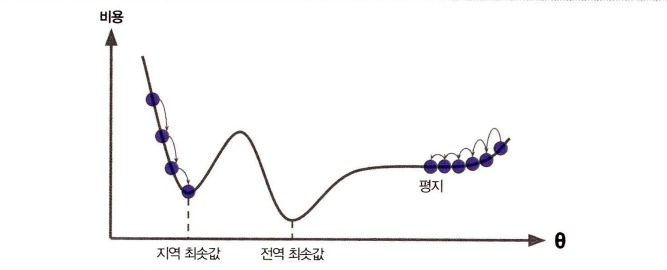

* 선형 회귀를 위한 MSE 비용 함수는 곡선에서 어떤 두 점을 선택해 선을 그어도 곡선을 가로지르지 않는 볼록 함수. 이는 지역 최솟값이 없고 하나의 전역 최솟값만 있다는 뜻.
* 또한 연속된 함수이고 기울기가 갑자기 변하지 않음.
* → 이 두 사실로부터 경사 하강법이 전역 최솟값에 가깝에 접근할 수 있다는 것을 보장함.

* 비용 함수는 그릇 모양을 하고 있지만 특성들의 스케일이 매우 다르면 길쭉한 모양일 수 있음.
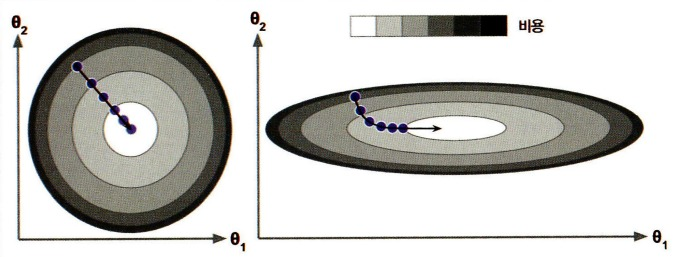


* 왼쪽의 경사 하강법 알고리즘이 최솟값으로 곧장 진행하고 있어 빠르게 도달함.
* 오른쪽 그래프는 처음엔 전역 최솟값의 방향에 거의 직각으로 향하다가 평편한 골짜기를 길게 돌아서 나감.

* 모델이 가진 파라미터가 많을수록 파라미터 공간의 차원은 커지고 검색이 더 어려워짐.

### 4.2.1 배치 경사 하강법
* 경사 하강법을 구현하려면 각 모델 파라미터 $\theta_{j}$에 대해 비용 함수의 그래디언트를 계산해야 함.
* 편도함수: $theta_{j}$가 조금 변경될 때 비용 함수가 얼마나 바뀌는지 계산하는 것

* 비용 함수의 편도함수: $\frac{ \partial }{ \partial   \theta _{j} }MSE( \theta ) =  \frac{2}{m} \sum_{i=1}^m (  \theta ^{T}x^{(i)}- y^{(i)})x^{(i)}_{j}  $

* 비용 함수의 그래디언트 벡터:
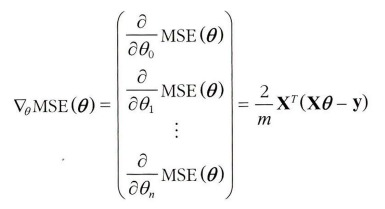

* 배치 경사 하강법: 매 스텝에서 훈련 데이터 전체를 계산함. 특성 수에 민감하지 않으며, 수십만 개의 특성에서 선형 회귀를 훈련시키려면 정규방정식이나 SVD 분해보다 경사 하강법을 사용하는 편이 빠름'

* 경사 하강법의 스텝:  $\theta ^{(next step)} =  \theta -  \eta    \nabla _{ \theta }MSE( \theta ) $

In [10]:
eta = 0.1    # 학습률
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1)    # 무작위 초기화

for iteration in range(n_iterations):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
  theta = theta - eta * gradients

In [11]:
theta

array([[3.58188043],
       [3.22855407]])

* 여러 가지 학습률에 대한 경사 하강법
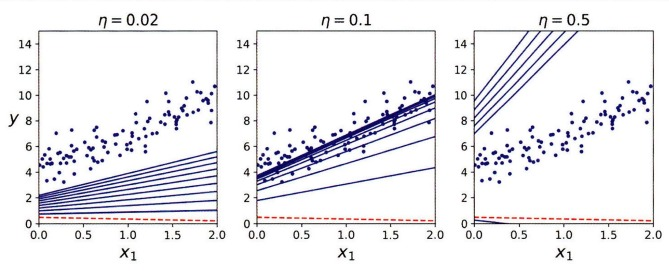

* 학습률이 낮은 경우: 알고리즘이 최적점에 도달하겠지만 시간이 오래 걸림
* 적당한 학습률: 반복 몇 번 만에 이미 최적점에 수렴
* 학습률이 높은 경우: 알고리즘이 이리저리 널뛰면서 스텝마다 최적점에서 점점 더 멀어져 발산함

* 적절한 학습률을 찾으려면 그리드 탐색을 사용함

* 반복 횟수: 너무 작으면 최적점에 도달하기 전에 알고리즘이 멈추고, 너무 크면 모델 파라미터가 더는 변하지 않는 동안 시간을 낭비하게 됨
* 반복 휫수를 아주 크게 지정하고 그레이디언트 벡터가 아주 작아지면, 즉 벡터의 노름이 어떤 값 $\varepsilon $(허용오차)보다 작아지면 경사 하겅법이 (거의) 최솟값에 도달한 것이므로 알고리즘을 중지하는 것

* 수렴율: 비용 함수가 볼록 함수이고 기울기가 급격하게 바뀌지 않는 경우, 학습률을 고정한 배치 경사 하강법은 어느 정도 시간이 걸리겠지만 결국 최적의 솔루션에 수렴함. 비용 함수의 모양에 따라 달라지겠지만 $\varepsilon $ 범위 안에서 최적의 솔루션에 도달하기 위해서는 $O(1/\varepsilon)$의 반복이 걸릴 수 있음.

### 4.2.2 확률적 경사 하강법
* 배치 경사 하강법의 단점: 매 스텝에서 전체 훈련 세트를 사용해 그레이디언트를 계산하기 때문에 훈련 세트가 커지면 매우 느려짐.
* 확률적 경사 하강법
 * 매 스텝에서 한 개의 샘플을 무작위로 선택하고 그 하나의 샘플에 대한 그레이디언트를 게산함.
 * 매 반복에서 다뤄야 할 데이터가 매우 적기 때문에 한 번에 하나의 샘플을 처리하면 알고리즘이 훨씬 빠름.
 * 매 반복에서 하나의 샘플만 메모리에 있으면 되므로 매우 큰 훈련 세트도 훈련시킬 수 있음
 * 반면 확률적이기 때문에 배치 경사 하강법보다 훨씬 불안정함. 비용 함수가 최솟값에 다다를 때까지 부드럽게 감소하지 않고 위아래로 요동치면서 평균적으로 감소. 시간이 지나면 최솟값에 매우 근접하겠지만 요동이 지속되면서 최솟값에 안착하지 못함.
 * 비용 함수가 매우 불규칙할 경우 알고리즘이 지역 최솟값을 건너뛸 수 있도록 도와주므로 확률적 경사 하강법이 배치 경사 하강법보다 전역 최솟값을 찾을 가능성이 높음.

* 무작위성은 지역 최솟값에서 탈출시켜줘서 좋지만 알고리즘을 전역 최솟값에 다다르지 못하게 한다는 점에서 좋지 않음. 이 딜레마를 해결하는 방법은 학습률을 점진적으로 감소시키는 것.
* 시작할 때는 학습률을 크게 하고, 점차 작게 줄여서 알고리즘이 전역 최솟값에 도달하게 함. (담금질 기법 알고리즘과 유사)
* 학습 스케줄: 매 반복에서 학습률을 결정하는 함수
* 학습률이 너무 천천히 줄어들면 오랫동안 최솟값 주변을 맴돌거나 훈련을 너무 일찍 중지해서 지역 최솟ㄱ밧에 머무를 수 있음.

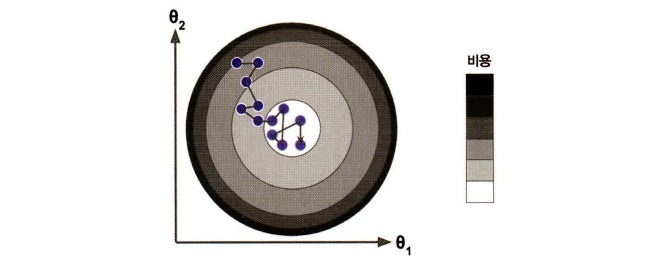

In [12]:
n_epochs = 50
t0, t1 = 5, 50    # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
  return t0 / (t + t1)

theta = np.random.randn(2, 1)    # 무작위 초기화

for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index: random_index + 1]
    yi = y[random_index: random_index + 1]
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(epoch * m + i)
    theta = theta - eta * gradients

* 에포크(epoch): 한 반복에서 m번 되풀이 될 때의 각 에포크

In [13]:
theta

array([[3.64196393],
       [3.18815078]])

* 확률적 경사 하강법의 첫 20개 스텝
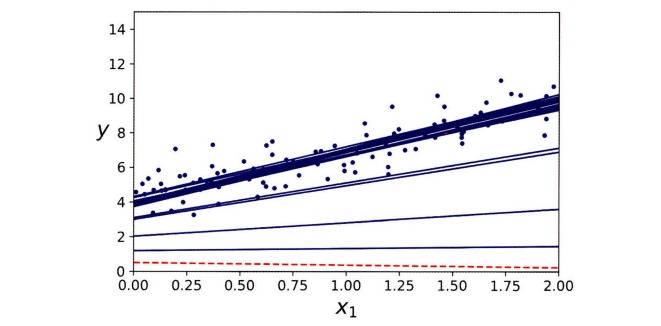

* 샘플을 무작위로 선택하기 때문에 어떤 샘플은 한 에포크에서 여러번 선택될 수 있고 어떤 샘플은 전혀 선택되지 못할 수도 있음
* 알고리즘이 에포크마다 모든 샘플을 사용하게 하려면 훈련 세트를 섞은 후 차례대로 하나씩 선택하고 다음 에포크에서 다시 섞는 식의 방법을 사용할 수 있음. 그러나 이렇게 하면 보통 더 늦게 수렴됨.
* 사이킷런에서 SGD 방식으로 선형 회귀를 사용하려면 제곱 오차 비용 함수를 최적화하는 SGDRegressor 클래스를 사용함.

In [14]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = None, eta0 = 0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [15]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.60347635]), array([3.32633039]))

* 정규방정식으로 구한 것과 매우 비슷한 값을 얻음

### 4.2.3 미니배치 경사 하강법
* 미니배치 경사 하강법: 각 스텝에서 전체 훈련 세트나 하나의 샘플을 기반으로 그레이디언트를 계산하는 것이 아니라 미니배치라 부르는 임의의 작은 샘플 세트에 대해 그레이디언트를 계산.
* 장점: 행렬 연산에 최적화된 하드웨어, 특히 GPU를 사용해서 얻는 성능 향상
* 미니배치를 어느 정도 크게 하면 이 알고리즘은 파라미터 공간에서 SGD보다 덜 불규칙하게 움직임. 결국 미니배치 경사 하강법이 SGD보다 최솟값에 더 가까이 도달함. 하지만 지역 최솟값에서 빠져나오기는 더 힘들 수 있음.

* 파라미터 공간에 표시된 경사 하강법의 경로
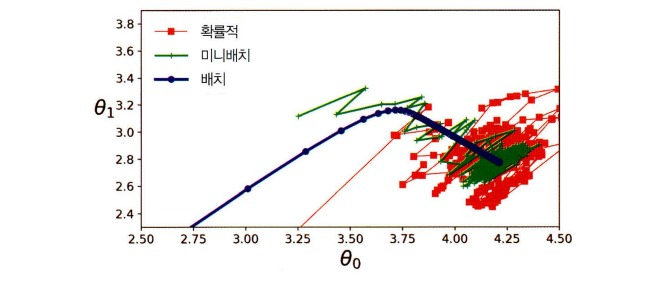

 * 모두 최솟값 근처에 도달했지만 배치 경사 하강법의 경로가 실제로 최솟값에서 멈춘 반면 확률적 경사 하강법과 미니배치 경사 하강법은 근처에서 맴돌고 있음.
 * 그렇지만 배치 경사 하강법에는 매 스텝에서 많은 시간이 소요되고, 확률적 경사 하강법과 미니배치 경사 하강법도 적절한 학습 스케줄을 사용하면 최솟값에 도달함.

* 선형 회귀를 사용한 알고리즘 비교
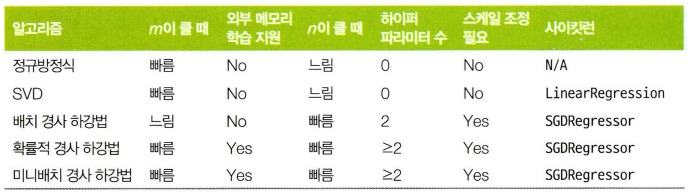

## 4.3 다항 회귀
* 다항 회귀: 각 특성의 거듭제곱을 새로운 특성으로 추가하고, 이 확장된 특성을 포함한 데이터셋에 선형 모델을 훈련시키는 것

In [16]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

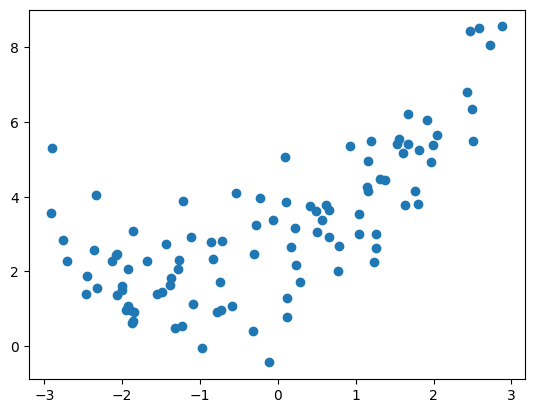

In [17]:
plt.scatter(X, y)
plt.show()

* 사이킷런의 PolynomialFeatures를 사용해 훈련 데이터 변환
* 훈련 세트에 있는 각 특성을 제곱(2차 다항)하여 새로운 특성으로 추가함

In [18]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_features.fit_transform(X)
X[0]

array([1.63017077])

In [19]:
X_poly[0]

array([1.63017077, 2.65745675])

In [20]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.32425546]), array([[0.94337606, 0.39203792]]))

* 특성이 여러 개일 때 다항 회귀는 이 특성 사이의 관계를 찾을 수 있음. PolynomialFeatures가 주어진 차수까지 특성 가느이 모든 교차항을 추가하기 때문.
* 예를 들어 두 개의 특성 a, b가 있을 때 degree = 3으로 PolynomialFeatures를 적용하면 $a^{2}, a^{3}, b^{2}, b^{3}$뿐만 아니라 $ab, a^{2}b, ab^{2}$도 특성으로 추가함.

## 4.4 학습 곡선
* 고차 다항 회귀를 적용하면 보통의 선형 회귀에서보다 훨씬 더 훈련 데이터에 잘 맞추려고 함.

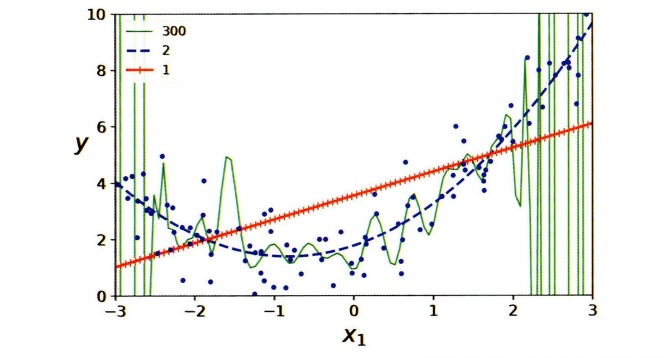

* 고차 다항 회귀 모델은 심각하게 훈련 데이터에 과대적합 되어있는 반면, 선형 모델은 과소적합. 가장 일반화과 잘 될 모델은 2차 다항회귀.
* 훈련 데이터에서 성능이 좋지만 교차 검증 점수가 나쁘다면 모델이 과대적합된것. 만약 양쪽에 모두 좋지 않으면 과소적합.
* 또 다른 방법은 학습 곡선을 살펴보는 것. 이 그래프는 훈련 세트와 검증 세트의 모델 성능을 훈련 세트 크기(또는 훈련 반복)의 함수로 나타냄. 이 그래프를 생성하기 위해서는 단순히 훈련 세트에서 크기가 다른 서브 세트를 만들어 모델을 여러 번 훈련시키면 됨.

In [21]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)
  train_errors, val_errors = [], []
  for m in range(1, len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))
  plt.plot(np.sqrt(train_errors), "r-+", linewidth = 2, label = "훈련 세트")
  plt.plot(np.sqrt(val_errors), "b-", linewidth = 3, label = "검증 세트")

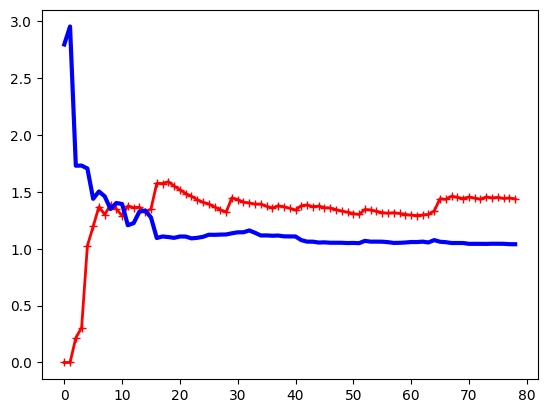

In [22]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

* 훈련 데이터 성능
 * 그래프가 0에서 시작하므로 훈련 세트에 하나 혹은 두 개의 샘플이 있을 땐 모델이 완벽하게 작동함. 하지만 훈련 세트에 샘플이 추가됨에 따라 잡음도 있고 비선형이기 때문에 모델이 훈련 데이터를 완벽하게 학습하는 것이 불가능해짐.
 * 그래서 곡선이 어느 정도 평편해질 때까지 오차가 계속 상승.

* 검증 데이터 성능
 * 모델이 적은 수의 훈련 샘플로 훈련될 때는 제대로 일반화될 수 없어서 검증 오차가 초기에 매우 큼.
 * 모델에 훈련 샘플이 추가됨에 따라 학습이 되고 검증 오차가 천천히 감소.
 * 하지만 선형 회귀의 직선은 데이터를 잘 모델링할 수 없으므로 오차의 감소가 완만해져서 훈련 세트의 그래프와 가까워짐.

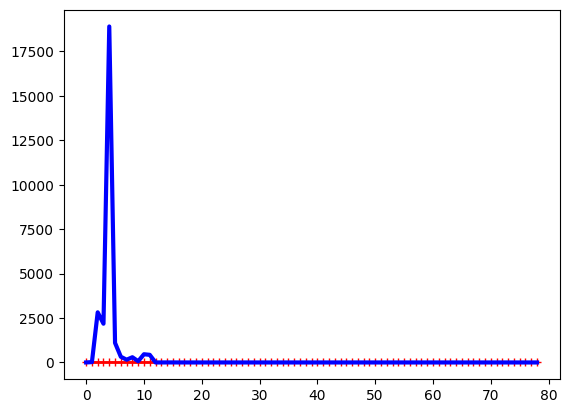

In [23]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)

* 이전 곡선과의 차이점
 * 훈련 데이터의 오차가 선형 회귀 모델보다 훨씬 나음
 * 두 곡선 사이에 공간이 있음. 이 말은 훈련 데이터에서의 모델 성능이 검증 데이터에서보다 훨씬 낫다는 뜻이고, 이는 과대적합 모델의 특징. 그러나 더 큰 훈련 세트를 사용하면 두 곡선이 점점 가까워짐.

* 편향/분산 트레이드오프
 * 편향: 일반화 오차 중에서 편향은 잘못된 가정으로 인한 것. 예를 들어 데이터가 실제로는 2차인데 선형으로 가정하는 경우. 편향이 큰 모델은 훈련 데이터에 과소적합되기 쉬움.
 * 분산(variance): 훈련 데이터에 있는 작은 변동에 모델이 과도하게 민감하기 때문. 자유도가 높은 모델이 높은 분산을 가지기 쉬워 훈련 데이터에 과대적합되는 경향.
 * 줄일 수 없는 오차(irreducible error): 데이터 자체에 있는 잡음 때문에 발생. 이 오차를 줄일 수 있는 유일한 방법은 데이터에서 잡음을 제거하는 것.

## 4.5 규제가 있는 선형 모델
* 과대적합을 감소시키는좋은 방법은 모델을 규제하는 것.
* 자유도를 줄이면 데이터가 과대적합되기 더 어려워짐. 다항 회귀 모델을 규제하는 간단한 방법은 다항식의 차수를 감소시키는 것.

### 4.5.1 릿지 회귀
* 릿지 회귀(티호노프 규제): 규제가 추가된 선형 회귀 버전
* 규제항 $\alpha\sum_{i = 1}^n\theta _{i}^{2}$이 비용 함수에 추가됨. → 학습 알고리즘을 데이터에 맞추는 것뿐만 아니라 모델의 가중치가 가능한 작게 유지되도록 노력.
* 규제항은 훈련하는 동안에만 비용 함수에 추가됨. 모델의 훈련이 끄나면 모델의 성능을 규제가 없는 성능 지표로 평가.

* 하이퍼파라미터 $\alpha$는 모델을 얼마나 많이 규제할지 조절.
 * $\alpha$ = 0이면 릿지 회귀는 선형 회귀와 같음.
 * $\alpha$가 아주 크면 모든 가중치가 거의 0에 가까워지고 결국 데이터의 평균을 지나는 수평선이 됨.

* 릿지 회귀의 비용 함수: $J( \theta ) = MSE( \theta ) +  \alpha  \frac{1}{2} \sum_{i = 1}^n    \theta _{i} ^{2}   $

* 편향 $ \theta _{0} $은 규제되지 않음.
* $w$를 특성의 가중치 벡터($\theta_{1} $에서 $\theta_{n}$)라고 정의하면 규제항은 $\frac{1}{2}( \mid  \mid w \mid  \mid)^{2} $과 같음.
* 여기서 $\parallel  ·  \parallel_{2}$가 가중치 벡터의 $l_{2}$ 노름이다.
* 경사 하강법에 적용하려면 MSE 그레이디언트 벡터에 $\alpha w$를 더하면 됨.

* $\alpha$를 증가시킬수록 직선에 가까워지는것을 볼 수 있음. 즉, 모델의 분산은 줄지만 편향은 커짐.

* 다양한 수준의 릿지 규제를 사용한 선형 회귀(왼쪽)와 다항 회귀(오른쪽).
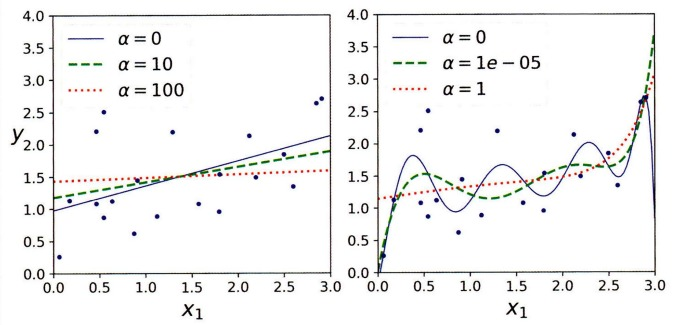

* 선형 회귀와 마찬가지로 릿지 회귀를 계산하기 위해 정규방정식을 사용할 수도 있고 경사 하강법을 사용할 수도 있음.

* 릿지 회귀의 정규방정식: $\hat{ \theta } = (X^{T}X +  \alpha A)^{-1}X^{T}y $


In [24]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 1, solver = "cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.59589744]])

In [25]:
sgd_reg = SGDRegressor(penalty = "l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.56170406])

* panalty 매개변수는 사용할 규제를 지정. "l2"는 SGD가 비용 함수에 가중치 벡터의 $l_{2}$노름의 제곱을 2로 나눈 규제항을 추가하게 만듦. 즉, 릿지 회귀와 같음.

### 4.5.2 라쏘 회귀
* 라쏘 회귀: 릿지 회귀처럼 비용 함수에 규제항을 더하지만 $l_{2}$ 노름의 제곱을 2로 나눈 것 대신 가중치 벡터의 $l_{1}$ 노름을 사용함.

* 라쏘 회귀의 비용 함수: $J( \theta ) = MSE( \theta ) +  \alpha  \sum_{i=1}^n  \mid  \theta _{i}\mid$

* 다양한 수준의 라쏘 규제를 사용한 선형 회귀와 다향 회귀
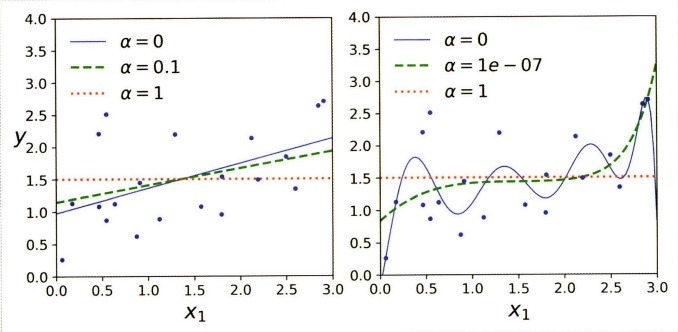

* 라쏘 회귀의 특징
 * 덜 중요한 특성의 가중치를 제거하려고 함.
 * 라쏘 회귀는 자동으로 특성 선택을 하고 희소 모델을 만듦. (0이 아닌 특성의 가중치가 적음)

* 라쏘 대 릿지 규제
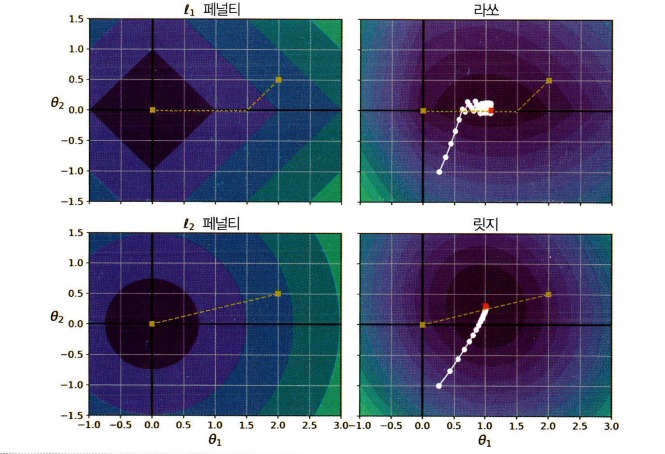

* 릿지와 라쏘의 다른 점
 * 파라미터가 전역 최적점에 가까워질수록 그레이디언트가 작아짐. 따라서 경사 하강법이 자동으로 늘지고 수렴에 도움이 됨.
 * $\alpha$를 증가시킬수록 최적의 파라미터가 원점에 더 가까워짐. 하지만 완전히 0이 되지는 않음.

* 라쏘의 비용 함수는 $\theta _{i} = 0(i = 1, 2,  \ldots , n$일 때)에서 미분이 가능하지 않음. 하지만 $\theta_{i} = 0$일 때 서브그레이디언트 벡터 g를 사용하면 경사 하강법을 적용하는 데 문제가 없음.

* 라쏘 회귀의 서브그레이디언트 벡터
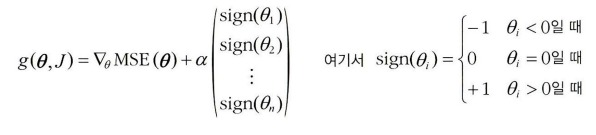

In [26]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.53581736])

### 4.5.3 엘라스틱넷
* 엘라스틱넷: 릿지 회귀와 라쏘 회귀를 절충한 모델. 규제항은 릿지와 회귀의 규제항을 단순히 더해서 사용하며, 혼합 정도는 혼합 비율 r을 사용해 조절함.
* r = 0이면 엘라스틱넷은 릿지 회귀와 같고, r = 1이면 라쏘 회귀와 같음.

* 엘라스틱넷 비용 함수: $J( \theta ) = MSE( \theta ) + r \alpha  \sum_{i=1}^n  | \theta _{i}| +  \frac{1-r}{2} \alpha  \sum_{i=1}^n  \theta _{i}^{2}    $

* 적어도 규제가 약간 있는 것이 대부분의 경우에 좋으므로 일반적으로 평범한 선형 회귀는 피해야 함.
* 릿지가 기본이 되지만 쓰이는 특성이 몇 개뿐이라고 의심되면 라쏘나 엘레스틱넷이 나음
* 특성 수가 훈련 샘플 수보다 많거나 특성 몇 개가 강하게 연관되어 있을 때는 보통 라쏘가 문제를 일으키므로 라쏘보다는 엘라스틱넷을 선호.

In [28]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha = 0.1, l1_ratio = 0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.54140228])

### 4.5.4 조기 종료
* 조기 종료: 검증 에러가 최솟값에 도달하면 바로 훈련을 중지. 검증 에러가 최소에 도달하는 즉시 훈련을 멈춤.

* 조기 종료 규제
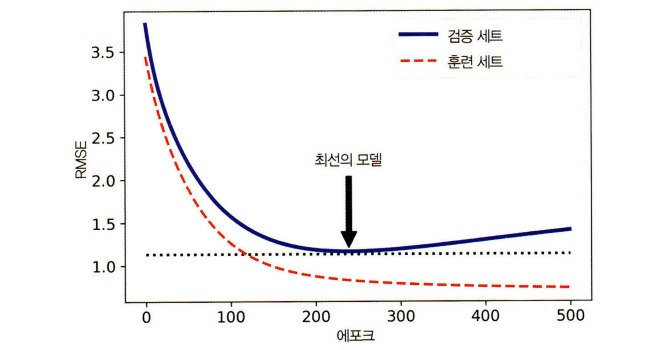

In [34]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler
X_train, X_val, y_train, y_val=train_test_split(X, y, test_size=0.2)

# 데이터 준비
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree = 90, include_bias = False)),
    ("std_scaler", StandardScaler())
])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter = 1, tol = None, warm_start = True,
                       penalty = None, learning_rate = "constant", eta0 = 0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
  sgd_reg.fit(X_train_poly_scaled, y_train)   # 훈련을 이어서 진행합니다.
  y_val_predict = sgd_reg.predict(X_val_poly_scaled)
  val_error = mean_squared_error(y_val, y_val_predict)
  if val_error < minimum_val_error:
    minimum_val_error = val_error
    best_epoch = epoch
    best_model = clone(sgd_reg)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

* warm_start = True로 지정하면 fit() 메서드가 호출될 때 처음부터 다시 시작하지 않고 이전 모델 파라미터에서 훈련을 이어감.

## 4.6 로지스틱 회귀
* 로지스틱 회귀(로짓 회귀): 샘플이 특정 클래스에 속할 확률을 추정하는데 널리 사용됨. 추정 확률이 50%가 넘으면 모델은 그 샘플이 해당 클래스에 속한다고 예측. 아니면 클래스에 속하지 않는다고 예측. 이를 이진 분류기라고 함.

### 4.6.1 확률 추정
* 선형 회귀 모델과 같이 로지스틱 회귀 모델은 입력 특성의 가중치 합을 계산하고, 편향을 더함. 대신 선형 회귀처럼 바로 결과를 출력하지 않고 결괏값의 로지스틱을 출력함.

* 로지스틱 회귀 모델의 확률 추정(벡터 표현식): $\hat{p} = h_{ \theta }(x) =  \sigma ( \theta ^{T}x) $

* 로지스틱은 0과 1 사이의 값을 출력하는 시그모이드 함수.

* 로지스틱 함수: $\sigma (t) =  \frac{1}{1 + exp(-t)} $
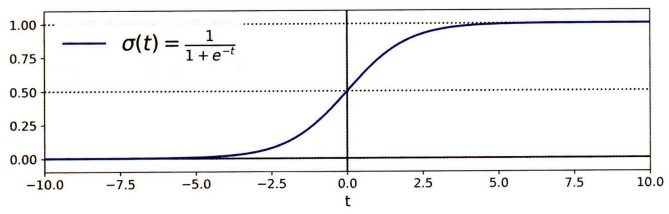

* 로지스틱 회귀 모델 예측
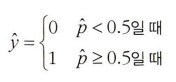

* t < 0이면 $\sigma(t) < 0.5$이고, t >= 0이면 $\sigma(t) >= 0.5$ 이므로 로지스틱 회귀 모델은 $\sigma^{T}x$가 양수일 때 1(양성 클래스)이라고 예측하고, 음수일 때 0(음성 클래스)이라고 에측함.

### 4.6.2 훈련과 비용 함수
* 훈련의 목적은 양성 샘플(y = 1)에 대해서는 높은 확률을 추정하고 음성 샘플(y = 0)에 대해서는 낮은 확률을 추정하는 모델의 파라미터 벡터 $\theta$를 찾는 것.

* 하나의 훈련 샘플에 대한 비용 함수
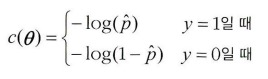

* 이 비용 함수는 t가 0에 가까워지면 -log(t)가 매우 커지므로 타당하다 할 수 있음. 그러므로 모델이 양성 샘플을 0에 가까운 확률로 추정하면 비용이 크게 증가할 것.
* 음성 샘플을 1에 가까운 확률로 추정해도 비용이 증가할 것. 반면에 t가 1에 가까우면 -log(t)는 0에 가까워짐. 따라서 음성 샘플의 확률을 0에 가깝게 추정하거나 양성 샘플의 확률을 1에 가깝게 추정하면 비용이 0에 가까워질 것임.

* 로그 손실: 전체 훈련 세트에 대한 비용 함수는 모든 훈련 샘플의 비용을 평균한 것.

* 로지스틱 회귀의 비용 함수(로그 손실): $J( \theta ) = - \frac{1}{m} \sum_{i=1}^m [y^{(i)}log( \hat{p}^{(i)}) + (1-y^{(i)})log(1- \hat{p}^{(i)})] $

* 이 비용 함수의 최솟값을 계산하는 알려진 해가 없음. 하지만 이 비용 함수는 볼록 함수이므로 경사 하강법이 전역 최솟값을 찾는 것을 보장함.

* 로지스틱 비용 함수의 편도함수: $\frac{  \partial }{ \partial  \theta _{j}}J( \theta ) =  \frac{1}{m} \sum_{i=1}^m ( \sigma ( \theta ^{T}x^{(i)})-y^{(i)})x_{j}^{(i)}$
 * 각 샘플에 대해 예측 오차를 계산하고 j번째 특성값을 곱해서 모든 훈련 샘플에 대해 평균을 냄. 모든 편도함수를 포함한 그래이디언트 벡터를 만들면 배치 경사 하강법 알고리즘을 사용할 수 있음.



### 4.6.3 결정 경계

In [36]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [37]:
X = iris["data"][:, 3:]   # 꽃잎의 너비
y = (iris["target"] == 2).astype(np.int)    # 1 Iris-Virginica면 1, 그렇지 않으면 0

<ipython-input-37-3ad250ead6b7>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris["target"] == 2).astype(np.int)    # 1 Iris-Virginica면 1, 그렇지 않으면 0


In [38]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

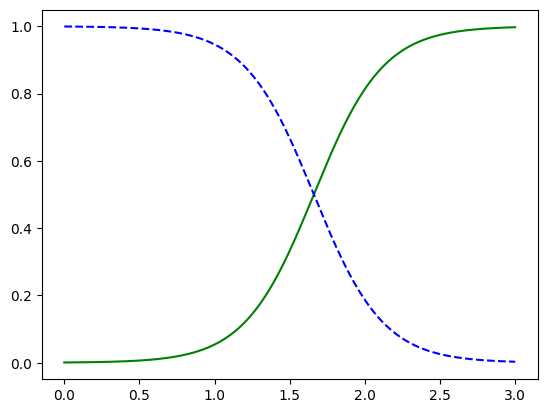

In [41]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label = "Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label = "Not Iris virginica")

* 클래스를 예측하려고 하면 가장 가능성 높은 클래스를 반환함.

In [42]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

* 훈련이 끝나면 로지스틱 회귀 분류기가 꽃잎 너비와 꽃잎 길이의 특성을 기반으로 하여 새로운 꽃이 Iris-Verginica인지 확률을 추정할 수 있음.

* 선형 결정 관계
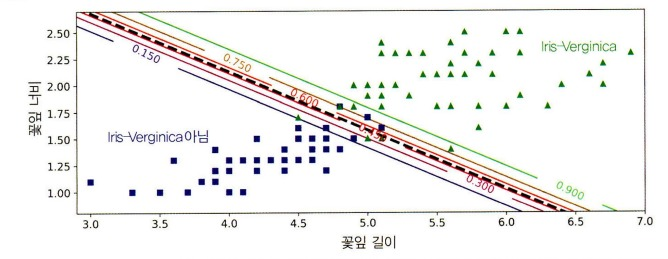

* 모델은 맨 오른쪽 위의 직선을 넘어서 있는 꽃들을 90% 이상의 확률로 Iris-Virginica로 판단할 것.

* 로지스틱 회귀 모델도 $\ell_{1}, \ell_{2}$ 페널티를 사용하여 규제할 수 있음. 사이킷런은 $\ell_{2}$ 페널티가 기본.

### 4.6.4 소프트맥스 회귀
* 소프트맥스 회귀(다항 로지스틱 회귀): 로지스틱 회귀 모델은 여러 개의 이진 분류기를 훈련시켜 연결하지 않고 직접 다중 클래스를 지원하도록 일반화될 수 있음.
* 샘플 x가 주어지면 먼저 소프트맥스 회귀 모델이 각 클래스 k에 대한 점수 $s_{k}(x)$를 계산하고, 그 점수에 소프트맥스 함수(정규화된 지수 함수)를 적용하여 각 클래스의 확률을 추정.

* 클래스 k에 대한 소프트맥스 점수: $s_{k}(x) = ( \theta ^{(k)})^{T}x$

* 각 클래스는 자신만의 파라미터 벡터 $\theta^{(k})$가 있으며, 이 벡터들은 파라미터 행렬에 행으로 저장됨.

* 샘플 x에 대해 각 클래스의 점수가 계산되면 소프트맥스 함수를 통가시켜 클래스 k에 속할 확률 $\hat{p}_{k} $을 추정할 수 있음. 이 함수는 각 점수에 지수 함수를 적용한 후 정규화함. 일반적으로 이 점수를 로짓 또는 로짓-오그라고 부름.

* 소프트맥스 함수: $\hat{p}_{k} =  \sigma (s(x))_{k} =  \frac{exp(s_{k}(x))}{ \sum_{j=1}^K exp(s_{j}(x)) } $
 * K: 클래스 수
 * s(x): 샘플 x에 대한 각 클래스의 점수를 담은 벡터
 * $\sigma(s(x))_{k}$: 샘플 x에 대한 각 클래스의 점수가 주어졌을 때 이 샘플이 클래스 k에 속할 추정 확률

* 소프트맥스 회귀 분류기의 에측: $\hat{y} = argmax \sigma (s(x))_{k} = argmaxs_{k}(x) = argmax(( \theta ^{(k)})^{T}x) $
 * argamx: 함수를 최대화하는 변수의 값을 반환. 이 식에서는 추정 확률 $\sigma(s(x))_{k}$가 최대인 k값을 반환.

* 모델이 타깃 클래스에 대해서는 높은 확률을 추정하도록 만드는 것이 목적.
* 크로스 엔트로피 비용 함수를 최소화하는 것은 타깃 클래스에 대해 낮은 확률을 예측하는 모델을 억제하므로 이 목적에 부합함.
* 크로스 엔트로피는 추정된 클래스의 확률이 타깃 클래스에 얼마나 잘 맞는지 측정하는 용도로 종종 사용됨.

* 크로스 엔트로피의 비용 함수: $J( \Theta ) = - \frac{1}{m} \sum_{i=1}^m \sum_{k=1}^K y_{k}^{(i)}log( \hat{p}_{k}^{(i)})    $
 * $y_{k}^{(i)}$: i번째 샘플이 클래서 k에 속할 타깃 확률.

* 크로스 엔트로피
 * 두 확률 분포 p와 q 사이의 크로스 엔드로피는 $H(p, q) = - \sum_x p(x)logq(x) $로 정의.

* 클래스 k에 대한 크로스 엔트로피의 그레이디언트 벡터: $\nabla _{ \theta ^{(k)}}J( \Theta ) =  \frac{1}{m} \sum_{i=1}^m( \hat{p}_{k}^{(i)} - y_{k}^{(i)})x^{(i)}   $

* 각 클래스에 대한 그레이디언트 벡터를 계산할 수 있으므로 비용 함수를 최소화하기 위한 파라미터 행렬 $\Theta $를 찾기 위해 경사 하강법을 사용할 수 있음

* 사이킷런의 LogisticRegression은 클래스가 둘 이상일 때 기본적으로 일대다(OvA) 전략을 사용함.
* 하지만 multi_class 매개변수를 "multinomial"로 바꾸면 소프트맥스 회귀를 사용할 수 있음.
* 소프트맥스 회귀를 사용하려면 solver 매개변수에 "lbfgs"와 같이 소프트맥스 회귀를 지원하는 알고리즘을 지정해야 하며, 기본적으로 하이퍼파라미터 C를 사용하여 조절할 수 있는 $\ell_{2}$ 규제가 적용됨.



In [44]:
X = iris["data"][:, (2, 3)]   # 꽃잎 길이, 꽃잎 너비
y = iris["target"]

softmax_reg = LogisticRegression(multi_class = "multinomial", solver = "lbfgs", C = 10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

In [45]:
softmax_reg.predict([[5, 2]])

array([2])

In [46]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])